### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import sys
import mglearn
import matplotlib
import scipy as sp
import IPython
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('C:/Users/hande/Downloads/winequality-red.csv')

In [31]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
X = df.drop('quality', axis = 1)
y = df['quality']

<AxesSubplot:>

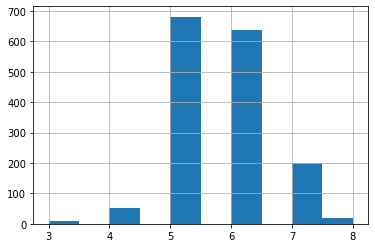

In [33]:
y.hist()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [35]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE

# RIDGE REGRESSION

In [36]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [37]:
ridge_model

Ridge(alpha=0.1)

In [38]:
ridge_model.coef_

array([ 0.00781478, -1.02297112, -0.13979851,  0.00182848, -1.69082909,
        0.00514743, -0.00368173, -0.11552008, -0.41545062,  0.78737895,
        0.30185043])

In [39]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

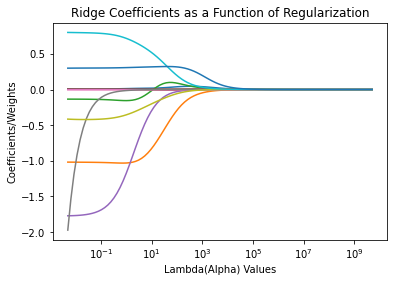

In [40]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coefficients = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coefficients.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdas, coefficients) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization');

In [41]:
# Prediction:
y_pred = ridge_model.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6233248958550857

In [43]:
# Model Tuning:
lambdas = 10**np.linspace(10,-2,100)*0.5 

In [44]:
lambdas[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [45]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [46]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [47]:
ridge_cv.alpha_

0.06164233697210317

In [48]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [49]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test))) # Test Error

0.6241760477567169

# LASSO

In [90]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [91]:
lasso_model

Lasso(alpha=0.1)

In [92]:
lasso_model.coef_

array([ 0.02214667, -0.        ,  0.        ,  0.        , -0.        ,
        0.00598117, -0.00423658, -0.        , -0.        ,  0.        ,
        0.26112841])

Text(0, 0.5, 'weights')

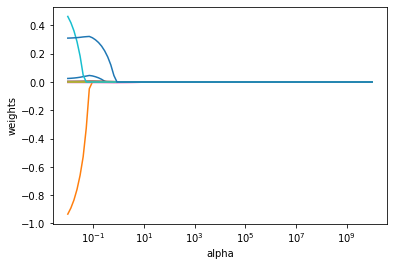

In [93]:
lasso = Lasso()
lambdas = 10**np.linspace(10,-2,100)*0.5 
coefficients = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [94]:
# Prediction:
lasso_model.predict(X_test)

array([5.3914444 , 5.17216596, 5.60500538, 5.5182095 , 5.70518977,
       5.34359887, 5.04349325, 5.57085607, 5.50284059, 5.78901577,
       6.11142218, 5.55688703, 5.4701742 , 5.35422954, 5.35040612,
       6.22524262, 5.36528859, 5.51764712, 6.05247485, 5.34688756,
       5.80830659, 5.28424723, 6.08602934, 6.26901198, 5.53709512,
       5.42076898, 6.12608711, 5.57094478, 5.20918877, 5.64379558,
       5.38148047, 5.49205553, 5.46628671, 5.62627388, 5.51929621,
       5.19184806, 5.8692346 , 5.70787843, 5.73246003, 5.98514181,
       5.62163508, 5.23806204, 5.76780324, 5.17908844, 5.48020009,
       5.7116046 , 5.82265963, 5.46255061, 5.67758039, 5.67586208,
       5.06189876, 5.19887642, 5.85100386, 6.02612365, 5.18728693,
       5.08678905, 5.88850377, 5.49529504, 5.78169914, 5.47842811,
       5.49118911, 5.77475509, 5.31310876, 5.30045421, 6.17109526,
       5.33054485, 6.09630502, 5.41620208, 6.03518047, 5.31459687,
       6.22162476, 5.22278555, 5.41505822, 5.86552513, 6.10047

In [95]:
y_pred = lasso_model.predict(X_test)

In [96]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6990916411472458

In [97]:
# Model Tuning:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [98]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [99]:
lasso_cv_model.alpha_

0.0002643428783691967

In [101]:
#Lasso Final Model:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [102]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.0002643428783691967)

In [103]:
# Examining the Final Model's test failure/error:
y_pred = lasso_tuned.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6240632683765854

* Ridge regressor to extract coefficients
* SequentialFeatureSelection using the Lasso to select four features
* RFE using the Lasso to select four features

In [55]:
# Building PolynomialFeatures
poly_features = PolynomialFeatures(degree = 6, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides']])
X_test_poly = poly_features.fit_transform(X_test[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides']])
columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns = columns)


train_df['target_log'] = y_train.values
test_df['target_log'] = y_test.values



train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,fixed acidity^2,fixed acidity volatile acidity,fixed acidity citric acid,fixed acidity residual sugar,fixed acidity chlorides,...,citric acid residual sugar chlorides^4,citric acid chlorides^5,residual sugar^6,residual sugar^5 chlorides,residual sugar^4 chlorides^2,residual sugar^3 chlorides^3,residual sugar^2 chlorides^4,residual sugar chlorides^5,chlorides^6,target_log
0,11.7,0.490,0.49,2.2,0.083,136.89,5.7330,5.733,25.74,0.9711,...,0.000051,1.930130e-06,113.379904,4.277515,0.161379,0.006088,0.000230,0.000009,3.269404e-07,5
1,8.8,0.600,0.29,2.2,0.098,77.44,5.2800,2.552,19.36,0.8624,...,0.000059,2.621370e-06,113.379904,5.050559,0.224979,0.010022,0.000446,0.000020,8.858424e-07,5
2,7.1,0.590,0.00,2.1,0.091,50.41,4.1890,0.000,14.91,0.6461,...,0.000000,0.000000e+00,85.766121,3.716532,0.161050,0.006979,0.000302,0.000013,5.678693e-07,7
3,8.3,0.540,0.24,3.4,0.076,68.89,4.4820,1.992,28.22,0.6308,...,0.000027,6.085261e-07,1544.804416,34.530922,0.771868,0.017254,0.000386,0.000009,1.926999e-07,5
4,9.3,0.775,0.27,2.8,0.078,86.49,7.2075,2.511,26.04,0.7254,...,0.000028,7.795371e-07,481.890304,13.424087,0.373957,0.010417,0.000290,0.000008,2.251996e-07,6


In [56]:
test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,fixed acidity^2,fixed acidity volatile acidity,fixed acidity citric acid,fixed acidity residual sugar,fixed acidity chlorides,...,citric acid residual sugar chlorides^4,citric acid chlorides^5,residual sugar^6,residual sugar^5 chlorides,residual sugar^4 chlorides^2,residual sugar^3 chlorides^3,residual sugar^2 chlorides^4,residual sugar chlorides^5,chlorides^6,target_log
0,7.7,0.56,0.08,2.50,0.114,59.29,4.312,0.616,19.250,0.8778,...,3.377920e-05,1.540332e-06,244.140625,11.132813,0.507656,0.023149,0.001056,0.000048,2.194973e-06,6
1,7.8,0.50,0.17,1.60,0.082,60.84,3.900,1.326,12.480,0.6396,...,1.229771e-05,6.302577e-07,16.777216,0.859832,0.044066,0.002258,0.000116,0.000006,3.040067e-07,5
2,10.7,0.67,0.22,2.70,0.107,114.49,7.169,2.354,28.890,1.1449,...,7.786128e-05,3.085614e-06,387.420489,15.353330,0.608447,0.024113,0.000956,0.000038,1.500730e-06,6
3,8.5,0.46,0.31,2.25,0.078,72.25,3.910,2.635,19.125,0.6630,...,2.581800e-05,8.950241e-07,129.746338,4.497873,0.155926,0.005405,0.000187,0.000006,2.251996e-07,5
4,6.7,0.46,0.24,1.70,0.077,44.89,3.082,1.608,11.390,0.5159,...,1.434244e-05,6.496282e-07,24.137569,1.093290,0.049520,0.002243,0.000102,0.000005,2.084224e-07,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,6.7,0.67,0.02,1.90,0.061,44.89,4.489,0.134,12.730,0.4087,...,5.261420e-07,1.689193e-08,47.045881,1.510420,0.048492,0.001557,0.000050,0.000002,5.152037e-08,6
396,10.3,0.44,0.50,4.50,0.107,106.09,4.532,5.150,46.350,1.1021,...,2.949291e-04,7.012759e-06,8303.765625,197.445094,4.694806,0.111632,0.002654,0.000063,1.500730e-06,5
397,7.1,0.60,0.00,1.80,0.074,50.41,4.260,0.000,12.780,0.5254,...,0.000000e+00,0.000000e+00,34.012224,1.398280,0.057485,0.002363,0.000097,0.000004,1.642065e-07,6
398,7.8,0.62,0.05,2.30,0.079,60.84,4.836,0.390,17.940,0.6162,...,4.479259e-06,1.538528e-07,148.035889,5.084711,0.174649,0.005999,0.000206,0.000007,2.430875e-07,5


In [71]:
# Using SequentialFeatureSelector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())

best_features_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,target_log
0,11.7,0.490,0.49,2.2,0.083,5.0
1,8.8,0.600,0.29,2.2,0.098,5.0
2,7.1,0.590,0.00,2.1,0.091,7.0
3,8.3,0.540,0.24,3.4,0.076,5.0
4,9.3,0.775,0.27,2.8,0.078,6.0


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Pipeline for regression model
pipe = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])
pipe.fit(train_df, y_train)
train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

Train MSE:  0.00
Test MSE:  0.00


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# construct pipeline
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2)
lin_reg = LinearRegression()

pipe = Pipeline([
    ('scaler', scaler),
    ('poly', poly_features),
    ('regressor', lin_reg)
])

print(pipe.named_steps)
# {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
# 'poly': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
#                  order='C'),
# 'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}

pipe.fit(X, y)
y_pred = pipe.predict(X)

print(y_pred) 
print("R^2: {}".format(pipe.score(X, y))) 

{'scaler': StandardScaler(), 'poly': PolynomialFeatures(), 'regressor': LinearRegression()}
[5.1775106  5.09367414 5.27094359 ... 6.04911289 5.3445775  5.90723514]
R^2: 0.43463578687828175


In [76]:
# Scaled Ridge Pipeline
scaled_ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
scaled_ridge_pipe.fit(X_train, y_train)
train_preds = scaled_ridge_pipe.predict(X_train)
test_preds = scaled_ridge_pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.42741884555047666
Test MSE: 0.38831110647255684


In [77]:
ridge_coefs = scaled_ridge_pipe.named_steps['ridge'].coef_
print(ridge_coefs)

[ 0.03789095 -0.1815072  -0.02586149  0.01267413 -0.08656018  0.05116873
 -0.12048662 -0.03046328 -0.05261369  0.14356923  0.3024526 ]


In [78]:
ridge_coefs_df = pd.DataFrame({'coef': ridge_coefs, 'category': X_train.columns}).set_index('category').sort_values(by = 'coef',ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

In [79]:
print(ridge_coefs_df)

                          coef
category                      
volatile acidity     -0.181507
total sulfur dioxide -0.120487
chlorides            -0.086560
pH                   -0.052614
density              -0.030463
citric acid          -0.025861
residual sugar        0.012674
fixed acidity         0.037891
free sulfur dioxide   0.051169
sulphates             0.143569
alcohol               0.302453


## Sequential Feature Using Lasso

In [80]:
# Sequntial Pipe(4 features) Linear Regression 4 Feat
sequential_pipe = Pipeline([
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=4)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))
print(sequential_train_mse)
print(sequential_test_mse)
sequential_pipe

0.43707106044677807
0.40218318692903393


Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=4)),
                ('linreg', LinearRegression())])

## Lasso and Ridge

In [81]:

lasso_pipe = Pipeline([('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                       ('scaler', StandardScaler()),
                     ('ridge', Ridge())])
lasso_pipe.fit(X_train, y_train)
lasso_coefs = lasso_pipe.named_steps['ridge'].coef_
print(lasso_coefs)

[-0.01571662 -0.27964657  0.03100756 -0.14894612]


In [82]:
feature_names = lasso_pipe.named_steps.selector.get_feature_names_out()

In [83]:
print(feature_names)

['fixed acidity' 'volatile acidity' 'citric acid' 'total sulfur dioxide']


In [84]:
coefs2 = pd.DataFrame( lasso_coefs,
    columns = ['Coefficients'],
    index = feature_names)
coefs2

,Coefficients
fixed acidity,-0.015717
volatile acidity,-0.279647
citric acid,0.031008
total sulfur dioxide,-0.148946


In [85]:
lasso_ridge_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train))
lasso_ridge_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))
print(f'The Lasso Ridge Training MSE: {lasso_ridge_train_mse}')
print(f'The Lasso Ridge Testing MSE: {lasso_ridge_test_mse}')

The Lasso Ridge Training MSE: 0.5477973896548033
The Lasso Ridge Testing MSE: 0.5027406580661811


## RFE using the Lasso

In [86]:
lasso_pipe2 = Pipeline([('selector',
                 RFE(estimator=Lasso(), n_features_to_select=4)),
                       ('scaler', StandardScaler()),
                     ('ridge', Ridge())])
lasso_pipe2.fit(X_train, y_train)
lasso_coefs2 = lasso_pipe2.named_steps['ridge'].coef_
print(lasso_coefs2)

[-0.09560055 -0.08240061  0.14056502  0.37638177]


In [87]:
feature_names2 = lasso_pipe2.named_steps.selector.get_feature_names_out()
print(feature_names)

['fixed acidity' 'volatile acidity' 'citric acid' 'total sulfur dioxide']


In [88]:
coefs3 = pd.DataFrame( lasso_coefs2,
    columns = ['Coefficients'],
    index = feature_names)
coefs3

,Coefficients
fixed acidity,-0.095601
volatile acidity,-0.082401
citric acid,0.140565
total sulfur dioxide,0.376382


In [89]:
lasso_RFE_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train))
lasso_ridge_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))
print(f'The Lasso Ridge Training MSE: {lasso_ridge_train_mse}')
print(f'The Lasso Ridge Testing MSE: {lasso_ridge_test_mse}')

The Lasso Ridge Training MSE: 0.5477973896548033
The Lasso Ridge Testing MSE: 0.5027406580661811
